# Data Loading & Replacing NANs

In [83]:
import numpy as np 
import pandas as pd 
import os 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

!pip install -U scikit-learn

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd
import numpy as np

#Replace with Equivalent Colab Code to read files

train_data = pd.read_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Dataset/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Dataset/test.csv")

train_data = train_data.apply(lambda x: x.astype(str).str.upper())
test_data = test_data.apply(lambda x: x.astype(str).str.upper())

train_data['Fault'][train_data['Fault']==0] = -1

#Replace NANs
train_data=train_data.replace('NONE',np.nan)
train_data=train_data.replace('NAN',np.nan)
train_data=train_data.replace('NA',np.nan)

test_data=test_data.replace('NONE',np.nan)
test_data=test_data.replace('NAN',np.nan)
test_data=test_data.replace('NA',np.nan)

display(train_data)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,Municipality,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Non-Motorist Substance Abuse,Person ID,Injury Severity,Circumstance,Drivers License State,Vehicle ID,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Second Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location,Fault
0,MP060D,10196,MONTGOMERY COUNTY POLICE,INJURY CRASH,06/05/2017 04:27:00 PM,MARYLAND (STATE),OLD HUNDRED RD,COUNTY,THURSTON RD,12305 SHOREFIELD RD,NaN,NaN,SINGLE VEHICLE,CLEAR,WET,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,466D8B-AC8C7,SUSPECTED MINOR INJURY,"N/A, WET",MD,7C2FEC-727F4,DESTROYED,TWELVE OCLOCK,TWELVE OCLOCK,PICKUP TRUCK,MOVING CONSTANT SPEED,SOUTH,UNKNOWN,40,NO,NO,2005,GMC,TRUCK,NO MISUSE,39.26337833,-77.34420333,3.6383 7.4233,1
1,MP000X,20080,MONTGOMERY COUNTY POLICE,INJURY CRASH,02/22/2020 10:00:00 AM,COUNTY,JANET RD,COUNTY,FLACK ST,NaN,NaN,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,NONE DETECTED,NaN,4028E4-C5384,NO APPARENT INJURY,"BACKUP DUE TO REGULAR CONGESTION, SLEET, HAIL,...",MD,67644F-64EF8,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,ACCELERATING,SOUTH,SOUTH,25,NO,YES,2018,FORD,FIESTA,NO MISUSE,39.06891333,-77.06322667,3.0862 7.324,1
2,MP070N,10103,MONTGOMERY COUNTY POLICE,PROPERTY DAMAGE CRASH,06/11/2017 08:21:00 AM,MARYLAND (STATE),COLESVILLE RD,MARYLAND (STATE),STRUC #15082,NaN,NaN,NaN,SAME DIRECTION RIGHT TURN,CLEAR,DRY,UNKNOWN,OTHER,NaN,NaN,889DBD-D57FF,NO APPARENT INJURY,NaN,DC,30F7A9-92C98,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,TRANSIT BUS,PARKING,WEST,WEST,35,NO,NO,2016,NEW FLYER,TBU,NO MISUSE,38.99357833,-77.03271833,3.9583 7.3783,0
3,MP130Y,10208,MONTGOMERY COUNTY POLICE,INJURY CRASH,05/10/2019 07:30:00 AM,COUNTY,PARKLAND DR,COUNTY,FRANKFORT DR,NaN,NaN,NaN,OTHER,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,77155D-96AA7,POSSIBLE INJURY,NaN,MD,0F0C58-8E98F,FUNCTIONAL,TWELVE OCLOCK,TWO OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,SOUTH,SOUTH,25,NO,NO,2001,CHEV,SUBURBAN,OTHER,39.08348,-77.08693333,"3.84,-70633",1
4,MP770Y,1091,MONTGOMERY COUNTY POLICE,INJURY CRASH,08/02/2016 05:00:00 PM,MARYLAND (STATE),OLD GEORGETOWN RD,COUNTY,MCKINLEY ST,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,MEDICATION PRESENT,5E180B-42B0C,SUSPECTED MINOR INJURY,NaN,MD,4397C0-AEE83,DISABLING,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,SLOWING OR STOPPING,SOUTH,SOUTH,40,NO,NO,2013,KIA,RIO,NO MISUSE,38.99694167,-77.10916833,3.9917 7.0183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,MP6308,10034,MONTGOMERY COUNTY POLICE,INJURY CRASH,02/27/2019 10:58:00 AM,MARYLAND (STATE),GEORGIA AVE,COUNTY,GOLD MINE RD,NaN,NaN,NaN,SAME DIRECTION LEFT TURN,CLEAR,DRY,DAYLIGHT,NaN,NONE DETECTED,NaN,D62E6F-5303E,NO APPARENT INJURY,NaN,MD,81EDAB-31A73,NO DAMAGE,ELEVEN OCLOCK,TWELVE OCLOCK,OTHER,MAKING LEFT TURN,WEST,NORTH,40,NO,YES,2001,CAT,IT38H,NO MISUSE,39.17567833,-77.05854333,3.7683 7.5533,0
51486,MP2104,20221,MONTGOMERY COUNTY POLICE,INJURY CRASH,06/29/2020 01:29:00 PM,MARYLAND (STATE),FREDERICK RD,COUNTY,E GUDE DR,NaN,NaN,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,NaN,E061AE-84ADB,NO APPARENT INJURY,NaN,MD,4A4524-1CDB4,SUPERFICIAL,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,ACCELERATING,NaN,NORTH,40,NO,NO,2006,LEXUS,SC430,NO MISUSE,39.10588333,-77.15781817,3.0833 7.5887,1
51487,MP240M,1007,MONTGOMERY COUNTY POLICE,INJURY CRASH,10/04/2016 03:17:00 PM,MARYLAND (STATE),FREDERICK RD,COUNTY,BRINK RD,NaN,NaN,NaN,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,NaN,DEBDD8

# Data Preprocessing
## Remove Columns Having 90% NANs or more

In [85]:
#Drop Attributes containing more than 90% values as "NA"
drop_cols = train_data.columns[train_data.isnull().mean() > 0.9]
train_data = train_data.drop(drop_cols,axis=1)
test_data = test_data.drop(drop_cols,axis=1)

print(len(train_data.columns))

40


## Drop Columns having Constant Values & Check % of NULLs 

In [86]:
#Drop Columns having constant values
train_data = train_data.loc[:, (train_data != train_data.iloc[0]).any()] 

print(len(train_data.columns))

nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/train_data.shape[0]*100)
print(nulls_percentage.head(15))

print(train_data.info())

40
Off-Road Description      86.502233
Municipality              85.303943
Circumstance              77.176151
Equipment Problems        20.714702
Driver Substance Abuse    17.663624
Traffic Control           15.098077
Local Case Number         12.532531
Surface Condition         11.417751
Cross-Street Type          9.747524
Route Type                 9.648475
Cross-Street Name          8.782288
Road Name                  8.743445
Weather                    7.824820
Drivers License State      4.909691
Vehicle Continuing Dir     2.192659
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Report Number                   51490 non-null  object
 1   Local Case Number               45037 non-null  object
 2   Agency Name                     51490 non-null  object
 3   ACRS Report Type            

In [87]:
#From the above data, Off-Road Description, Municipality and Circumstance have majorly empty values, so drop these columns
train_data = train_data.drop(["Off-Road Description","Municipality","Circumstance"], axis=1)
test_data = test_data.drop(["Off-Road Description","Municipality","Circumstance"], axis=1)
nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/train_data.shape[0]*100)
print(nulls_percentage.head(15))

print(train_data.info())

Equipment Problems        20.714702
Driver Substance Abuse    17.663624
Traffic Control           15.098077
Local Case Number         12.532531
Surface Condition         11.417751
Cross-Street Type          9.747524
Route Type                 9.648475
Cross-Street Name          8.782288
Road Name                  8.743445
Weather                    7.824820
Drivers License State      4.909691
Vehicle Continuing Dir     2.192659
Vehicle Going Dir          2.161585
Vehicle Body Type          1.524568
Light                      1.367256
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Report Number                   51490 non-null  object
 1   Local Case Number               45037 non-null  object
 2   Agency Name                     51490 non-null  object
 3   ACRS Report Type               

## Data Imputation: Replacing Remaining NANs with "Unknown"

In [88]:
#Replace Unknown Cols

#We replace NANs of "Driver Substance Abuse" with UNKNOWN
train_data["Driver Substance Abuse"] = train_data["Driver Substance Abuse"].fillna("UNKNOWN")
test_data["Driver Substance Abuse"] = test_data["Driver Substance Abuse"].fillna("UNKNOWN")

#We replace NANs of "Equipment Problems" with UNKNOWN
train_data["Equipment Problems"] = train_data["Equipment Problems"].fillna("UNKNOWN")
test_data["Equipment Problems"] = test_data["Equipment Problems"].fillna("UNKNOWN")

#We replace NANs of "Traffic Control" with UNKNOWN
train_data["Traffic Control"] = train_data["Traffic Control"].fillna("UNKNOWN")
test_data["Traffic Control"] = test_data["Traffic Control"].fillna("UNKNOWN")

nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/train_data.shape[0]*100)
print(nulls_percentage.head(15))

print(train_data.info())

Local Case Number                 12.532531
Surface Condition                 11.417751
Cross-Street Type                  9.747524
Route Type                         9.648475
Cross-Street Name                  8.782288
Road Name                          8.743445
Weather                            7.824820
Drivers License State              4.909691
Vehicle Continuing Dir             2.192659
Vehicle Going Dir                  2.161585
Vehicle Body Type                  1.524568
Light                              1.367256
Vehicle Damage Extent              0.771023
Collision Type                     0.580695
Vehicle Second Impact Location     0.454457
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Report Number                   51490 non-null  object
 1   Local Case Number              

In [89]:
#We will introduce this new unknown
train_data['Local Case Number'] = train_data['Local Case Number'].fillna("UNKNOWN")
test_data['Local Case Number'] = test_data['Local Case Number'].fillna("UNKNOWN")


nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/train_data.shape[0]*100)
print(nulls_percentage.head(15))

print(train_data.info())

Surface Condition                 11.417751
Cross-Street Type                  9.747524
Route Type                         9.648475
Cross-Street Name                  8.782288
Road Name                          8.743445
Weather                            7.824820
Drivers License State              4.909691
Vehicle Continuing Dir             2.192659
Vehicle Going Dir                  2.161585
Vehicle Body Type                  1.524568
Light                              1.367256
Vehicle Damage Extent              0.771023
Collision Type                     0.580695
Vehicle Second Impact Location     0.454457
Vehicle First Impact Location      0.431152
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Report Number                   51490 non-null  object
 1   Local Case Number              

In [90]:
#We will introduce this new unknown
train_data['Surface Condition'] = train_data['Surface Condition'].fillna("UNKNOWN")
test_data['Surface Condition'] = test_data['Surface Condition'].fillna("UNKNOWN")

train_data['Cross-Street Type'] = train_data['Cross-Street Type'].fillna("UNKNOWN")
test_data['Cross-Street Type'] = test_data['Cross-Street Type'].fillna("UNKNOWN")

train_data['Route Type'] = train_data['Route Type'].fillna("UNKNOWN")
test_data['Route Type'] = test_data['Route Type'].fillna("UNKNOWN")

train_data['Cross-Street Name'] = train_data['Cross-Street Name'].fillna("UNKNOWN")
test_data['Cross-Street Name'] = test_data['Cross-Street Name'].fillna("UNKNOWN")

train_data['Road Name'] = train_data['Road Name'].fillna("UNKNOWN")
test_data['Road Name'] = test_data['Road Name'].fillna("UNKNOWN")

train_data['Weather'] = train_data['Weather'].fillna("UNKNOWN")
test_data['Weather'] = test_data['Weather'].fillna("UNKNOWN")

train_data['Drivers License State'] = train_data['Drivers License State'].fillna("UNKNOWN")
test_data['Drivers License State'] = test_data['Drivers License State'].fillna("UNKNOWN")

train_data['Vehicle Continuing Dir'] = train_data['Vehicle Continuing Dir'].fillna("UNKNOWN")
test_data['Vehicle Continuing Dir'] = test_data['Vehicle Continuing Dir'].fillna("UNKNOWN")

train_data['Vehicle Going Dir'] = train_data['Vehicle Going Dir'].fillna("UNKNOWN")
test_data['Vehicle Going Dir'] = test_data['Vehicle Going Dir'].fillna("UNKNOWN")

train_data['Vehicle Body Type'] = train_data['Vehicle Body Type'].fillna("UNKNOWN")
test_data['Vehicle Body Type'] = test_data['Vehicle Body Type'].fillna("UNKNOWN")

train_data['Light'] = train_data['Light'].fillna("UNKNOWN")
test_data['Light'] = test_data['Light'].fillna("UNKNOWN")

train_data['Vehicle Damage Extent'] = train_data['Vehicle Damage Extent'].fillna("UNKNOWN")
test_data['Vehicle Damage Extent'] = test_data['Vehicle Damage Extent'].fillna("UNKNOWN")

train_data['Collision Type'] = train_data['Collision Type'].fillna("UNKNOWN")
test_data['Collision Type'] = test_data['Collision Type'].fillna("UNKNOWN")

train_data['Vehicle Second Impact Location'] = train_data['Vehicle Second Impact Location'].fillna("UNKNOWN")
test_data['Vehicle Second Impact Location'] = test_data['Vehicle Second Impact Location'].fillna("UNKNOWN")

train_data['Vehicle First Impact Location'] = train_data['Vehicle First Impact Location'].fillna("UNKNOWN")
test_data['Vehicle First Impact Location'] = test_data['Vehicle First Impact Location'].fillna("UNKNOWN")

nulls = train_data.isnull().sum().sort_values(ascending=False)
nulls_percentage = (nulls/train_data.shape[0]*100)
print(nulls_percentage.head(50))

print(train_data.info())

Vehicle Movement                  0.384541
Vehicle Model                     0.040785
Vehicle Make                      0.019421
Fault                             0.000000
Cross-Street Name                 0.000000
Driver Substance Abuse            0.000000
Traffic Control                   0.000000
Light                             0.000000
Surface Condition                 0.000000
Weather                           0.000000
Collision Type                    0.000000
Cross-Street Type                 0.000000
Injury Severity                   0.000000
Road Name                         0.000000
Route Type                        0.000000
Crash Date/Time                   0.000000
ACRS Report Type                  0.000000
Agency Name                       0.000000
Local Case Number                 0.000000
Person ID                         0.000000
Vehicle ID                        0.000000
Drivers License State             0.000000
Location                          0.000000
Vehicle Dam

In [91]:
train_data['Vehicle Movement'] = train_data['Vehicle Movement'].fillna("UNKNOWN")
test_data['Vehicle Movement'] = test_data['Vehicle Movement'].fillna("UNKNOWN")

train_data['Vehicle Model'] = train_data['Vehicle Model'].fillna("UNKNOWN")
test_data['Vehicle Model'] = test_data['Vehicle Model'].fillna("UNKNOWN")

train_data['Vehicle Make'] = train_data['Vehicle Make'].fillna("UNKNOWN")
test_data['Vehicle Make'] = test_data['Vehicle Make'].fillna("UNKNOWN")

print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Report Number                   51490 non-null  object
 1   Local Case Number               51490 non-null  object
 2   Agency Name                     51490 non-null  object
 3   ACRS Report Type                51490 non-null  object
 4   Crash Date/Time                 51490 non-null  object
 5   Route Type                      51490 non-null  object
 6   Road Name                       51490 non-null  object
 7   Cross-Street Type               51490 non-null  object
 8   Cross-Street Name               51490 non-null  object
 9   Collision Type                  51490 non-null  object
 10  Weather                         51490 non-null  object
 11  Surface Condition               51490 non-null  object
 12  Light                           51490 non-null

## Introduce two more float columns from Location Column 

In [92]:
# Cretae "Location1" and "Location2" from "Location" column
train_data[["Location 1", "Location 2"]] = train_data['Location'].str.split(',| |/', expand=True)
test_data[["Location 1", "Location 2"]] = test_data['Location'].str.split(',| |/', expand=True)
train_data[["Location 1", "Location 2"]] = train_data[["Location 1", "Location 2"]].astype('float64')
test_data[["Location 1", "Location 2"]] = test_data[["Location 1", "Location 2"]].astype('float64')
train_data = train_data.drop(['Location'], axis = 1)
test_data = test_data.drop(['Location'], axis = 1)

# Add decimal point to "Location2" column
def add_decimal_point(s):
    if s >= 0:
        return s
    else:
        s = str(s)[1:].replace(".", "")
        s = float(s[0] + "." + s[1:])
        return s

train_data["Location 2"] = train_data.apply(lambda x: add_decimal_point(x["Location 2"]), axis=1)
test_data["Location 2"] = test_data.apply(lambda x: add_decimal_point(x["Location 2"]), axis=1)

print(len(test_data.columns))
print(len(train_data.columns))


38
38


# One-Hot Encoding & Ordinal/Label/Manual Encoding

In [93]:
object_cols = ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Injury Severity', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems']

oneHot = []
notoneHot = []
#Count Unique values in each object Column
for c in object_cols:
    n1 = len(pd.unique(train_data[c]))
    n2 = len(pd.unique(test_data[c]))
    if(n1==n2):
        oneHot.append(c)
    else:
        notoneHot.append(c)
        
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder(handle_unknown="ignore", sparse=False)

oneHot_train = pd.DataFrame(oe.fit_transform(train_data[oneHot]))
oneHot_test = pd.DataFrame(oe.fit_transform(test_data[oneHot]))

oneHot_train.index = train_data.index
oneHot_test.index = test_data.index

train_data = train_data.drop(oneHot,axis=1)
test_data = test_data.drop(oneHot,axis=1)

train_data = pd.concat([train_data,oneHot_train], axis=1)
test_data = pd.concat([test_data,oneHot_test], axis=1)

#1 SKLEARN ENCODER, 0:Manually

d_label = {}

for c in notoneHot:
    test_dc = sorted(list(set(test_data[c])))
    train_dc = sorted(list(set(train_data[c])))
    if(test_dc==train_dc):
        print(c,":Use SKlearn Label Encoder")
        d_label[c] = 1
    else:
        print(c,":Label Manually")
        d_label[c] = 0


for c in notoneHot:
    if(d_label[c]==1):
        train_data[c] = le.fit_transform(train_data[c].astype(str))
        test_data[c] = le.fit_transform(test_data[c].astype(str))
    else:
        tc = sorted(list(set(list(train_data[c])+list(test_data[c]))))
        ls = list(range(len(tc)))
        d_c = dict(zip(tc,ls))
        train_data[c] = [d_c[x] for x in train_data[c]]
        test_data[c] = [d_c[x] for x in test_data[c]]
        
print(len(test_data.columns))
print(len(train_data.columns))

Report Number :Label Manually
Local Case Number :Label Manually
Road Name :Label Manually
Cross-Street Name :Label Manually
Person ID :Label Manually
Drivers License State :Label Manually
Vehicle ID :Label Manually
Vehicle Make :Label Manually
Vehicle Model :Label Manually
Equipment Problems :Label Manually
232
232


## Extracting Features from Date-Time 

In [94]:
#Now, for last feature Crash Date/Time, lets convert to integer

train_data['Crash Date/Time'] = pd.to_datetime(train_data['Crash Date/Time'])
train_data['Crash Year'] = train_data['Crash Date/Time'].dt.year
train_data['Crash Month'] = train_data['Crash Date/Time'].dt.month
train_data['Crash Day'] = train_data['Crash Date/Time'].dt.day
train_data['Crash DayofWeek'] = train_data['Crash Date/Time'].dt.dayofweek
train_data['Crash Time'] = train_data['Crash Date/Time'].dt.hour + train_data['Crash Date/Time'].dt.minute/60 + train_data['Crash Date/Time'].dt.second/3600
train_data = train_data.drop(["Crash Date/Time"],axis=1)

test_data['Crash Date/Time'] = pd.to_datetime(test_data['Crash Date/Time'])
test_data['Crash Year'] = test_data['Crash Date/Time'].dt.year
test_data['Crash Month'] = test_data['Crash Date/Time'].dt.month
test_data['Crash Day'] = test_data['Crash Date/Time'].dt.day
test_data['Crash DayofWeek'] = test_data['Crash Date/Time'].dt.dayofweek
test_data['Crash Time'] = test_data['Crash Date/Time'].dt.hour + test_data['Crash Date/Time'].dt.minute/60 + test_data['Crash Date/Time'].dt.second/3600
test_data = test_data.drop(["Crash Date/Time"],axis=1)

# Exploratory Data Analysis

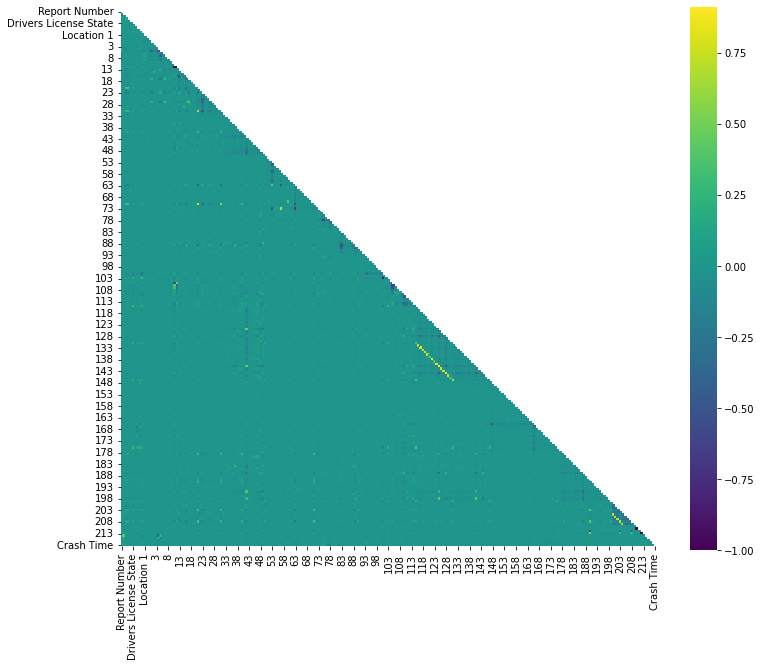

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
mask = np.zeros_like(train_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train_data.corr(), cmap='viridis', mask=mask, annot=False, square=True)


In [96]:
#We need to eliminate yellow squares
c = train_data.corr().abs()
unstack_corr = c.unstack()
pairs = unstack_corr.sort_values(ascending=False)

corr_pairs = pd.DataFrame(pairs).drop_duplicates().reset_index()
corr_pairs.columns = ['feature1', 'feature2', 'corr']


# check feature pairs above 0.8 in correlation

cond1 = (corr_pairs.feature1 != corr_pairs.feature2)
cond2 = (corr_pairs['corr']>0.80)

corr_pairs[cond1 & cond2]

,feature1,feature2,corr
1,12,11,0.965378
2,141,125,0.912198
3,128,144,0.873162
4,101,103,0.835913
5,138,122,0.832876
6,117,133,0.829636
7,140,124,0.801802


In [97]:
#Remove highly correlated features
train_data = train_data.drop([213,211,12,141], axis=1)
test_data = test_data.drop([213,211,12,141], axis=1)

#Remove irrelevant columns through eyeballing
irrelevant_columns = ["Report Number", "Local Case Number", "Person ID", "Vehicle ID"]
train_data = train_data.drop(irrelevant_columns, axis=1)
test_data = test_data.drop(irrelevant_columns, axis=1)

### Add new features from Latitude and Longitude 

In [98]:
from sklearn.cluster import MiniBatchKMeans
coords = np.vstack((train_data[['Latitude', 'Longitude']].values,
                    test_data[['Latitude', 'Longitude']].values))

sample_ind = np.random.permutation(len(coords))[:51490]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

train_data.loc[:, 'Cluster'] = kmeans.predict(train_data[['Latitude', 'Longitude']])
test_data.loc[:, 'Cluster'] = kmeans.predict(test_data[['Latitude', 'Longitude']])

from sklearn.decomposition import PCA

pca = PCA().fit(coords)
train_data['pca0'] = pca.transform(train_data[['Latitude', 'Longitude']])[:, 0]
train_data['pca1'] = pca.transform(train_data[['Latitude', 'Longitude']])[:, 1]
test_data['pca0'] = pca.transform(test_data[['Latitude', 'Longitude']])[:, 0]
test_data['pca1'] = pca.transform(test_data[['Latitude', 'Longitude']])[:, 1]
 

# Collect Data to Numpy Array

In [99]:
#Now, let's collect as numpy array
train_labels = train_data["Fault"]
train_data = train_data.drop(["Fault"],axis=1)

print(train_data.columns)
print(len(train_data.columns))
X = train_data.values
y = train_labels.values

print(y.shape,X.shape)

Index([            'Road Name',     'Cross-Street Name', 'Drivers License State',           'Speed Limit',          'Vehicle Year',          'Vehicle Make',         'Vehicle Model',    'Equipment Problems',              'Latitude',             'Longitude',
       ...
                           210,                     212,            'Crash Year',           'Crash Month',             'Crash Day',       'Crash DayofWeek',            'Crash Time',               'Cluster',                  'pca0',                  'pca1'], dtype='object', length=230)
230
(51490,) (51490, 230)


In [100]:
#Test Train Split
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_train, y_train = shuffle(X, y, random_state=42)

# Best Model: CatBoost

## Training 

In [ ]:
#!pip install catboost

from catboost import CatBoostClassifier
clf4 = CatBoostClassifier(iterations=3500,
                           learning_rate=0.01,
                           depth = 8,
                           l2_leaf_reg = 4,
                           loss_function='Logloss',
                           border_count = 1,
                           subsample = 0.99,
                          leaf_estimation_method = 'Gradient',
                           verbose=True)
clf4.fit(X_train, y_train, eval_set=[(X_train, y_train)])
print(clf4.get_all_params())

## Testing 

In [54]:
x_cols = [c for c in test_data.columns if c!="Id"]
to_test = test_data[x_cols]
test_submit = test_data[["Id"]]
test_submit["Fault"] = clf4.predict(to_test.values)

#Replace with Colab Code
test_submit.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/submission_catb_22.csv", index=False)

## Hyperparameter Tuning 

In [ ]:
import sys
from catboost import CatBoostClassifier
from skopt.space import Real, Categorical, Integer
grid = {
        'l2_leaf_reg':[4],
       'learning_rate': [0.01],
        'iterations':[3500],
        'depth': [8],
        'max_leaves': [256],
        'subsample': [0.99],
    'leaf_estimation_method': ['Gradient'],
        'rsm': [0.1,0.2,0.4,0.6,0.8,1,1.2]
        
       }

model = CatBoostClassifier()
model.grid_search(grid,
            X = X_train,
            y= y_train,
            cv=3,
            partition_random_seed=0,
            calc_cv_statistics=True,
            search_by_train_test_split=True,
            refit=True,
            shuffle=True,
            stratified=None,
            train_size=0.4,
            verbose=True,
            plot=True,
            log_cout=sys.stdout,
            log_cerr=sys.stderr)

# Majority Vote of all the Results

In [ ]:
# First set of results
path1 = "/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Results - Tamal"
os.chdir(path1)
files_list = []
for filename in os.listdir():
    files_list.append(filename)

# Second set of results
path2 = "/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Results - Sankalp"
os.chdir(path2)
for filename in os.listdir():
    files_list.append(filename)

if len(files_list)%2 == 0:
    files_list = files_list[:-1]
print("Number of files considering: ", len(files_list))
print(files_list)

results_dict = {}
for i in range(len(files_list)):

    if files_list[i].startswith("submission_"):
        result =  pd.read_csv(f"{path1}/{files_list[i]}")
    else:
        result =  pd.read_csv(f"{path2}/{files_list[i]}")

    for i in range(result.shape[0]):
        if result.iloc[i]["Fault"]  == 1:
            if i in results_dict:
                results_dict[i][1] += 1
            else:
                results_dict[i] = [0, 1]
        else:
            if i in results_dict:
                results_dict[i][0] += 1
            else:
                results_dict[i] = [1, 0]
print("\n", results_dict)

count_pos, count_neg = 0,0
submission_file = pd.read_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Dataset/test.csv", usecols=["Id"])
submission_file["Fault"] = 0
for i in list(results_dict.keys()):
    if results_dict[i][0] > results_dict[i][1]:
        submission_file.at[i, "Fault"]  = 0
        count_neg += 1
    else:
        submission_file.at[i, "Fault"] = 1
        count_pos += 1
print("\nPositive and negative results: {} and {}".format(count_pos, count_neg))
submission_file.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/Results - combined/submission_all_3.csv", index=False)

Number of files considering:  153
['submission_catb_22 (1).csv', 'submission_rf_1.csv', 'submission_rf_2.csv', 'submission_rf_3.csv', 'submission_lgbm_1.csv', 'submission_lgbm_2.csv', 'submission_lgbm_3.csv', 'submission_lgbm_4.csv', 'submission_xgb_1.csv', 'submission_xgb_2.csv', 'submission_catb_1.csv', 'submission_catb_2.csv', 'submission_catb_3.csv', 'submission_catb_4.csv', 'submission_catb_5.csv', 'submission_lgbm_5.csv', 'submission_lgbm_6.csv', 'submission_catb_6.csv', 'submission_catb_7.csv', 'submission_catb_8.csv', 'submission_lgbm_7.csv', 'submission_catb_9.csv', 'submission_catb_10.csv', 'submission_lgbm_8.csv', 'submission_rf_4.csv', 'submission_rf_lgbm_cb_1.csv', 'submission_rf_lgbm_cb_2.csv', 'submission_catb_11.csv', 'submission_catb_12.csv', 'submission_catb_13.csv', 'submission_catb_14.csv', 'submission_catb_15.csv', 'submission_catb_16.csv', 'submission_catb_17.csv', 'submission_catb_18.csv', 'submission_catb_19.csv', 'submission_catb_20.csv', 'submission_catb_21.cs

# Other Models

## LGBM 

In [ ]:
#Try LGBM
import lightgbm as lgb
from sklearn.metrics import accuracy_score
clf3 = lgb.LGBMClassifier(n_estimators = 3000, learning_rate=0.01)
clf3.fit(X_train, y_train, eval_set=[(X_train, y_train)])

In [ ]:
x_cols = [c for c in test_data.columns if c!="Id"]
to_test = test_data[x_cols]
test_submit = test_data[["Id"]]
test_submit["Fault"] = clf3.predict(to_test.values)
test_submit.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/submission_lgbm_8.csv", index=False)

## Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=1000, criterion="entropy", max_features=0.3)
clf1.fit(X_train, y_train)

In [ ]:
x_cols = [c for c in test_data.columns if c!="Id"]
to_test = test_data[x_cols]
test_submit = test_data[["Id"]]
test_submit["Fault"] = list(clf.predict(to_test.values))
test_submit.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/submission_rf_4.csv", index=False)

## XGBoost 

In [ ]:
import xgboost as xgb
clf2 = xgb.XGBClassifier(n_estimators = 1000, learning_rate=0.01, booster = 'gbtree',callbacks = [xgb.callback.EarlyStopping(rounds='early_stopping_rounds',
                                        save_best=True)])
clf2.fit(X_train, y_train, eval_set=[(X_train, y_train)])

In [ ]:
x_cols = [c for c in test_data.columns if c!="Id"]
to_test = test_data[x_cols]
test_submit = test_data[["Id"]]
test_submit["Fault"] = clf2.predict(to_test.values)
test_submit.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/submission_xgb_2.csv", index=False)

## Weighted average results from multiple models 

In [ ]:
x_cols = [c for c in test_data.columns if c!="Id"]
to_test = test_data[x_cols]
test_submit = test_data[["Id"]]

In [ ]:
rf_results =  list(clf1.predict(to_test.values))
lgbm_results =  list(clf3.predict(to_test.values))
cb_results =  list(clf4.predict(to_test.values))

r_w,l_w,c_w = 0.2, 0.3, 0.5
count_pos, count_neg = 0,0

test_submit["Fault"] = [0]*len(test_submit)

for i in range(submission_file.shape[0]):
    res = r_w*rf_results.iloc[i]["Fault"] + l_w*lgbm_results.iloc[i]["Fault"] + c_w*cb_results.iloc[i]["Fault"]
    if res >= 0.5:
        test_submit.at[i, "Fault"]  = 1
        count_pos += 1
    else:
        test_submit.at[i, "Fault"] = 0
        count_neg += 1
print(count_pos, count_neg)
test_submit.to_csv("/content/drive/MyDrive/IITH FOML Hachathon: Driver Fault Classification/submission_rf_lgbm_cb_2.csv", index=False)